#### Gas Turbine Using Nueral Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline


In [2]:
df= pd.read_csv("gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.shape

(15039, 11)

In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [12]:
#Checking CoRelation  Pearson
df.corr()

df[df.corr()>80].sum() # No High Correlation Found between Features


AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [13]:
#Checking CoRelation using Spearman Rank 
df.corr(method ='spearman')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.419340,-0.509661,-0.057832,0.115616,0.154864,0.275065,-0.164567,0.071074,-0.026614,-0.618675
AP,-0.419340,1.000000,0.016270,0.030681,-0.000651,0.015992,-0.167013,0.114955,0.062975,0.004323,0.233076
AH,-0.509661,0.016270,1.000000,-0.144566,-0.290929,-0.313957,0.029097,-0.138233,-0.282515,0.201461,0.117367
AFDP,-0.057832,0.030681,-0.144566,1.000000,0.730367,0.700477,-0.401063,0.676690,0.712707,-0.429843,0.040471
GTEP,0.115616,-0.000651,-0.290929,0.730367,1.000000,0.975685,-0.472503,0.899634,0.985799,-0.703294,-0.192704
TIT,0.154864,0.015992,-0.313957,0.700477,0.975685,1.000000,-0.431488,0.894277,0.973144,-0.713670,-0.201399
TAT,0.275065,-0.167013,0.029097,-0.401063,-0.472503,-0.431488,1.000000,-0.496330,-0.480448,0.240341,-0.027537
TEY,-0.164567,0.114955,-0.138233,0.676690,0.899634,0.894277,-0.496330,1.000000,0.916620,-0.690492,-0.011021
CDP,0.071074,0.062975,-0.282515,0.712707,0.985799,0.973144,-0.480448,0.916620,1.000000,-0.705255,-0.160115
CO,-0.026614,0.004323,0.201461,-0.429843,-0.703294,-0.713670,0.240341,-0.690492,-0.705255,1.000000,0.169570


In [15]:
df[df.corr(method ='spearman')>80].sum() # No correation Found

AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
CDP     0.0
CO      0.0
NOX     0.0
dtype: float64

In [25]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=10,contamination="auto")
out=iso.fit_predict(df)
out


array([1, 1, 1, ..., 1, 1, 1])

In [26]:
df["outliers"]=out

C:\Users\ppran\AppData\Local\Temp\ipykernel_12992\1578432071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["outliers"]=out


In [27]:
df["outliers"].value_counts()

 1    7535
-1    2121
Name: outliers, dtype: int64

In [28]:
# Dropping The ouliers
df=df[df["outliers"]== 1]
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,outliers
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782,1
10,8.3047,1016.0,86.343,4.0870,23.747,1085.3,550.20,133.67,11.703,1.7118,81.995,1
11,8.4684,1016.1,86.491,4.0513,23.734,1085.1,550.14,134.24,11.775,1.4672,80.638,1
12,8.8856,1016.2,82.974,4.0503,23.869,1085.9,550.17,134.69,11.864,1.7113,80.533,1
13,9.3714,1016.6,79.980,4.0427,23.916,1085.9,550.09,134.68,11.860,1.6637,80.538,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15016,14.7820,1009.8,68.017,4.1527,24.087,1085.1,549.99,133.76,11.908,1.7076,77.092,1
15017,13.6390,1009.7,73.772,4.1783,24.111,1085.2,550.04,133.76,11.982,1.5963,75.681,1
15018,12.7590,1009.4,80.112,4.2114,24.317,1086.2,550.15,134.54,11.851,1.6053,76.154,1
15020,12.2120,1009.0,79.935,4.1351,24.205,1084.3,549.67,133.78,11.803,2.3480,79.477,1


In [29]:
df=df.drop(columns="outliers",axis=1)

In [30]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782
10,8.3047,1016.0,86.343,4.0870,23.747,1085.3,550.20,133.67,11.703,1.7118,81.995
11,8.4684,1016.1,86.491,4.0513,23.734,1085.1,550.14,134.24,11.775,1.4672,80.638
12,8.8856,1016.2,82.974,4.0503,23.869,1085.9,550.17,134.69,11.864,1.7113,80.533
13,9.3714,1016.6,79.980,4.0427,23.916,1085.9,550.09,134.68,11.860,1.6637,80.538
...,...,...,...,...,...,...,...,...,...,...,...
15016,14.7820,1009.8,68.017,4.1527,24.087,1085.1,549.99,133.76,11.908,1.7076,77.092
15017,13.6390,1009.7,73.772,4.1783,24.111,1085.2,550.04,133.76,11.982,1.5963,75.681
15018,12.7590,1009.4,80.112,4.2114,24.317,1086.2,550.15,134.54,11.851,1.6053,76.154
15020,12.2120,1009.0,79.935,4.1351,24.205,1084.3,549.67,133.78,11.803,2.3480,79.477


In [31]:
x= df.drop(columns="TEY",axis=1)
y=df["TEY"]

In [32]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5274, 10), (2261, 10), (5274,), (2261,))

In [33]:
# intiliaze ann model
ann=Sequential()

# Ad  hidden layers
ann.add(Dense(units=6,activation="relu"))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers

ann.compile(optimizer="adam",loss="mse")

#fit the data
ann.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
165/165 [==============================] - 1s 2ms/step - loss: 198.8708
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 19.2833
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 18.4547
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 17.4924
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 16.4380
Epoch 6/50
165/165 [==============================] - 0s 2ms/step - loss: 15.3145
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 14.4372
Epoch 8/50
165/165 [==============================] - 0s 2ms/step - loss: 13.6538
Epoch 9/50
165/165 [==============================] - 0s 2ms/step - loss: 12.8608
Epoch 10/50
165/165 [==============================] - 0s 2ms/step - loss: 11.9497
Epoch 11/50
165/165 [==============================] - 0s 2ms/step - loss: 11.3348
Epoch 12/50
165/165 [==============================] - 0s 2ms/step - loss: 10.5978
Epoch 13/50


### HyperParamater Tunning

In [37]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [39]:
ann = Sequential()
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1,))
ann.compile(optimizer='adam',loss='mse')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 250)

Epoch 1/250
165/165 [==============================] - 2s 5ms/step - loss: 52326.9297 - val_loss: 9199.1787
Epoch 2/250
165/165 [==============================] - 1s 3ms/step - loss: 9787.4414 - val_loss: 5819.3716
Epoch 3/250
165/165 [==============================] - 1s 3ms/step - loss: 6102.5205 - val_loss: 4328.5093
Epoch 4/250
165/165 [==============================] - 1s 3ms/step - loss: 4745.2964 - val_loss: 4206.9409
Epoch 5/250
165/165 [==============================] - 1s 3ms/step - loss: 4268.8022 - val_loss: 3968.3123
Epoch 6/250
165/165 [==============================] - 1s 3ms/step - loss: 4015.0020 - val_loss: 4512.6890
Epoch 7/250
165/165 [==============================] - 1s 3ms/step - loss: 3915.2771 - val_loss: 4362.1602
Epoch 8/250
165/165 [==============================] - 1s 3ms/step - loss: 3736.4182 - val_loss: 4316.8003
Epoch 9/250
165/165 [==============================] - 0s 3ms/step - loss: 3680.9561 - val_loss: 4382.4634
Epoch 10/250
165/165 [==============

Epoch 77/250
165/165 [==============================] - 0s 3ms/step - loss: 2185.8813 - val_loss: 2707.1284
Epoch 78/250
165/165 [==============================] - 1s 3ms/step - loss: 2220.5613 - val_loss: 2854.3074
Epoch 79/250
165/165 [==============================] - 1s 3ms/step - loss: 2185.0964 - val_loss: 3151.1304
Epoch 80/250
165/165 [==============================] - 1s 3ms/step - loss: 2217.0212 - val_loss: 2364.6267
Epoch 81/250
165/165 [==============================] - 1s 3ms/step - loss: 2164.2229 - val_loss: 2746.8237
Epoch 82/250
165/165 [==============================] - 1s 3ms/step - loss: 2179.5654 - val_loss: 2964.1169
Epoch 83/250
165/165 [==============================] - 1s 3ms/step - loss: 2102.1904 - val_loss: 2828.2390
Epoch 84/250
165/165 [==============================] - 0s 3ms/step - loss: 2092.9851 - val_loss: 2297.6477
Epoch 85/250
165/165 [==============================] - 0s 3ms/step - loss: 2178.5188 - val_loss: 2295.2551
Epoch 86/250
165/165 [======

<AxesSubplot:>

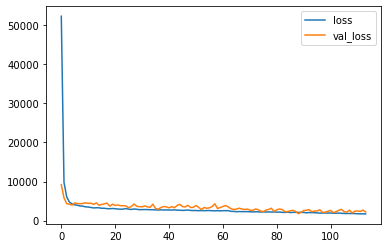

In [40]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

In [41]:
## Very low difference in validation and training loss